# Generate visualizations used in dp-viz project

In [4]:
import MyHeatmap
import matplotlib
import os
%matplotlib inline

cmR9 = matplotlib.colors.ListedColormap(["#fff5f0","#fee0d2","#fcbba1","#fc9272","#fb6a4a","#ef3b2c","#cb181d","#a50f15","#67000d"])

**Make sure to start the notebook in the virtualenv with requirements installed.**

In [10]:
dataDict= {
    "BJTaxi"  : "data/BJTaxi", 
    "BOS"     : "data/BOS", 
    "GOWALLA" : "data/GOWALLA", 
    "US"      : "data/US"
}
def getAllNumpyArrays(dataset):
    data = {}
    for filename in os.listdir(dataDict[dataset]):
        data[filename.strip('.npy')] = dataDict[dataset] + "/" + filename
    return data

## Input True data (Log Scale)

In [32]:
data = getAllNumpyArrays("US")
for i in data.values():
    print(i)

data/US/out_Identity_e1.npy
data/US/out_Identity_e1E-1.npy
data/US/in.npy


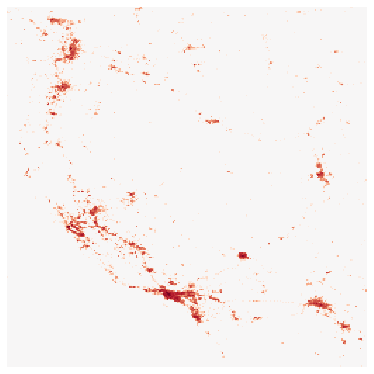

In [33]:
for d in data.values():
    if 'in' in d:
        MyHeatmap.drawHeatMap(name = d,
                              transformFunc = MyHeatmap.logNorm,
                              cmap = 'RdBu_r',
                              outName = os.path.basename(d)[:-4],
                              dpi = 256)

## Direct visualization of noisy output (Log Scale)

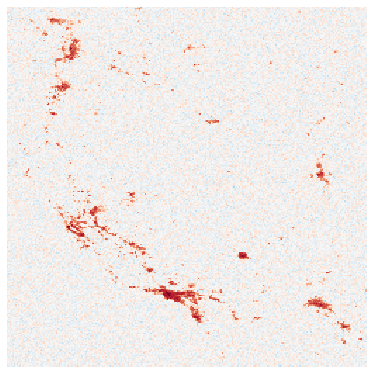

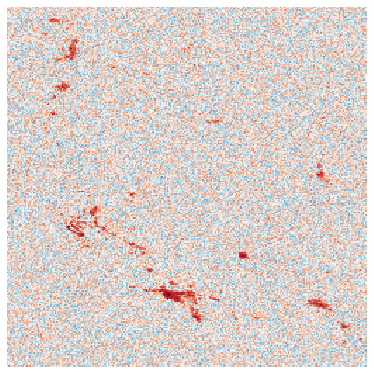

In [34]:
for d in data.values():
    if 'in' not in d:
        MyHeatmap.drawHeatMap(name = d,
                              transformFunc = MyHeatmap.logNorm,
                              cmap = 'RdBu_r',
                              nonNegative = False,
                              outName = os.path.basename(d)[:-4],
                              dpi = 256)

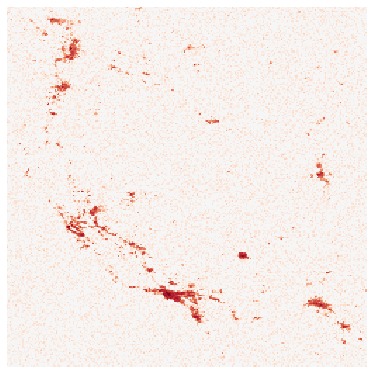

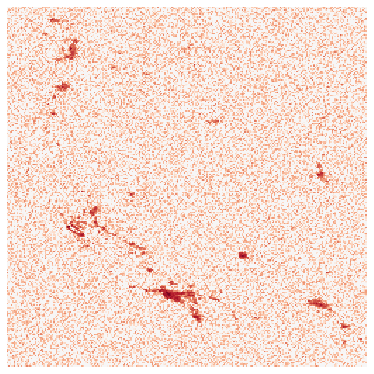

In [35]:
for d in data.values():
    if 'in' not in d:
        MyHeatmap.drawHeatMap(name = d,
                              transformFunc = MyHeatmap.logNorm,
                              cmap = 'RdBu_r',
                              nonNegative = True,
                              outName = os.path.basename(d)[:-4] + '_nonNeg',
                              dpi = 256)

## Smoothed visualization using binned corlormap and D correction (Log Scale)

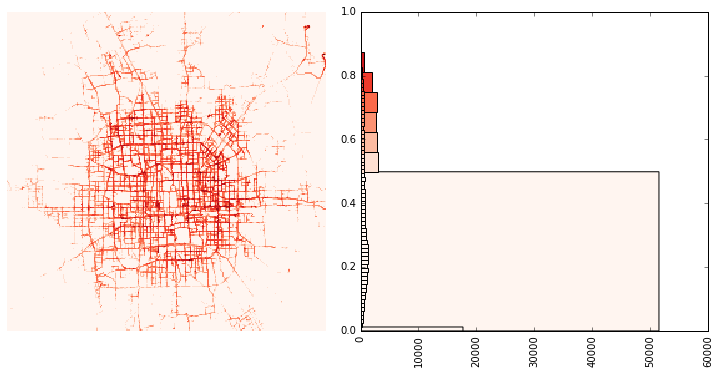

In [17]:
MyHeatmap.drawHeatMapSmooth(name = 'data/BJTaxi/out_Identity_1E8_e1E-1.npy',
                            binNum = 9,
                            transformFunc = MyHeatmap.logNorm,
                            deltaD = 500, # remember to change when using differe eps
                            uniformBin = False,
                            cmap = cmR9,
                            outName = "out_Identity_1E8_e1E-1_smooth",
                            dpi = 256)

In [18]:
# deltaD for corresponding epsilon values
deltaDdic={0.1:53,0.01:530,1:5.3, 10:0.53,5:1.05,3:1.76}